<a href="https://colab.research.google.com/github/Saket05/MachineLearning/blob/main/Jamboree_Education_Linear_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [348]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [349]:
!gdown https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/001/839/original/Jamboree_Admission.csv

Downloading...
From: https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/001/839/original/Jamboree_Admission.csv
To: /content/Jamboree_Admission.csv
100% 16.2k/16.2k [00:00<00:00, 50.8MB/s]


In [350]:
#reading the data
df=pd.read_csv("/content/Jamboree_Admission.csv")
print('No of rows in the dataset:',df.shape[0])

No of rows in the dataset: 500


In [351]:
df.head(5)

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [352]:
#checking different columns in the dataset
df.describe()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.00000,500.000000,500.000000,500.00000
mean,250.500000,316.472000,107.192000,3.114000,3.374000,3.48400,8.576440,0.560000,0.72174
std,144.481833,11.295148,6.081868,1.143512,0.991004,0.92545,0.604813,0.496884,0.14114
min,1.000000,290.000000,92.000000,1.000000,1.000000,1.00000,6.800000,0.000000,0.34000
25%,125.750000,308.000000,103.000000,2.000000,2.500000,3.00000,8.127500,0.000000,0.63000
50%,250.500000,317.000000,107.000000,3.000000,3.500000,3.50000,8.560000,1.000000,0.72000
75%,375.250000,325.000000,112.000000,4.000000,4.000000,4.00000,9.040000,1.000000,0.82000
max,500.000000,340.000000,120.000000,5.000000,5.000000,5.00000,9.920000,1.000000,0.97000


In [353]:
#Checking the data types of the variables
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Serial No.         500 non-null    int64  
 1   GRE Score          500 non-null    int64  
 2   TOEFL Score        500 non-null    int64  
 3   University Rating  500 non-null    int64  
 4   SOP                500 non-null    float64
 5   LOR                500 non-null    float64
 6   CGPA               500 non-null    float64
 7   Research           500 non-null    int64  
 8   Chance of Admit    500 non-null    float64
dtypes: float64(4), int64(5)
memory usage: 35.3 KB


In [354]:
#checking if null values are present in the data set or not
df.isna().sum()

Serial No.           0
GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance of Admit      0
dtype: int64

In [355]:
#to check whether duplicate rows are present in the dataset or not
df[df.duplicated()].shape

(0, 9)

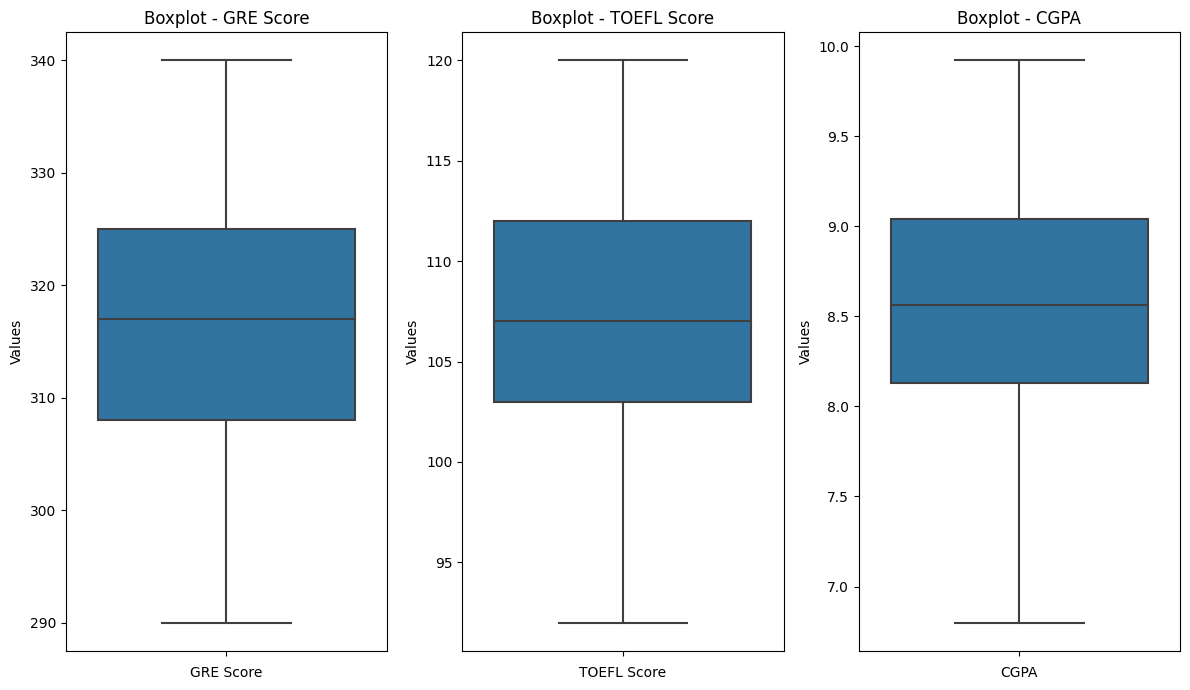

In [356]:
import matplotlib.pyplot as plt
import seaborn as sns


# check for outliers using boxplots
columns=['GRE Score','TOEFL Score','CGPA',]
rows, cols = 1, 3

fig, axs = plt.subplots(rows, cols, figsize=(12, 7))
axs = axs.flatten()
index = 0
for col,axs in zip(columns,axs):
     sns.boxplot(y=col, data=df, ax=axs)
     axs.set_title(f'Boxplot - {col}')
     axs.set_ylabel('Values')
     axs.set_xlabel(col)
     index += 1


plt.tight_layout()
plt.show()


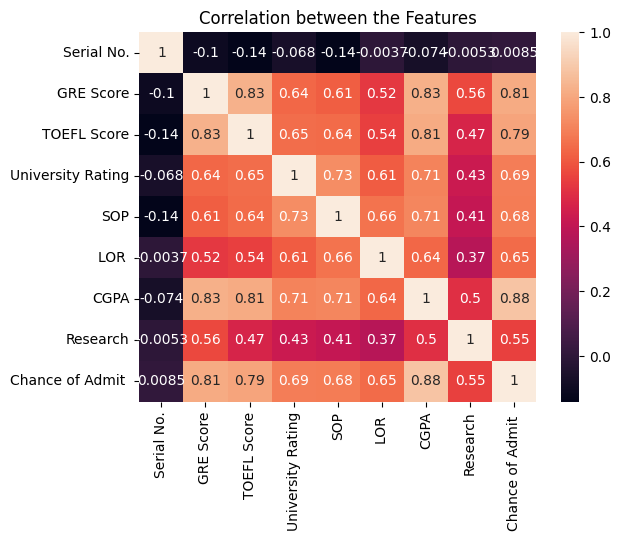

In [357]:
#generating the coorelation between different features
df_corr = df.corr()
sns.heatmap(df_corr, annot=True)
plt.title('Correlation between the Features')
plt.show()

#Inference: 'GRE Score','TOEFL Score' and 'CGPA' have high coorelation with chance of admit.

In [358]:
#Segregating the target variable and independent variable
y = df["Chance of Admit "]
X = df[['GRE Score','TOEFL Score','University Rating','SOP','LOR ','CGPA','Research']]

In [359]:
#test and train split
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(400, 7) (100, 7) (400,) (100,)


In [360]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler

#scaler = MinMaxScaler()
scaler=StandardScaler()

scaler.fit(X_train)

X_train=scaler.transform(X_train)
X_test=scaler.transform(X_test)

X_train = pd.DataFrame(X_train, columns = X.columns)
X_test = pd.DataFrame(X_test, columns = X.columns)

X_train.head(5)

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research
0,-0.53736,-0.519491,-0.054636,-1.337783,0.009331,-0.326582,-1.111142
1,0.16364,0.449257,-1.802983,-0.845045,0.009331,-0.045935,0.899975
2,-1.41361,-1.003865,-0.054636,0.140430,-1.057098,-1.135504,-1.111142
3,-1.41361,-1.326781,-1.802983,-0.352308,-1.590312,-2.918435,0.899975
4,0.51414,-0.519491,-0.054636,0.140430,0.542546,0.449323,0.899975


In [361]:
#Linear Regression Model
from sklearn.linear_model import LinearRegression, Ridge, Lasso
model = LinearRegression()

model.fit(X_train, y_train)

LinearRegression()

In [362]:
#predictions on the train data.
y_pred_train=model.predict(X_train)

In [363]:
#predictions on the test data.
y_pred_test = model.predict(X_test)
#y_pred=pd.DataFrame(y_pred)




In [364]:

from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error


def adj_r(r_sq,X,Y):
  adj_r1 = (1 - ((1-r_sq)*(len(Y)-1))/(len(Y)-X.shape[1]-1) )
  return adj_r1

print('The mean absolute error for train data is:',round(mean_absolute_error(y_train, y_pred_train),2))
print('The mean squared error for train data is:', round(mean_squared_error(y_train, y_pred_train,),4))
print('The r-squared error for train data is:',round(r2_score(y_train, y_pred_train),2))
print('The adjusted r-squared error for train data is:',round(adj_r(r2_score(y_train, y_pred_train), X_train,y_train),2))
print('\n')
print('The mean absolute error for test data is:',round(mean_absolute_error(y_test, y_pred_test),2))
print('The mean squared error for test data is:',round(mean_squared_error(y_test, y_pred_test),4))
print('The r-squared error for test data is:',round(r2_score(y_test, y_pred_test),2))
print('The adjusted r-squared error for test data is:',round(adj_r(r2_score(y_train, y_pred_train), X_train,y_train),2))

#the score on train and test data is similar, so we can say that the model id good and there in no overfit.

The mean absolute error for train data is: 0.04
The mean squared error for train data is: 0.0036
The r-squared error for train data is: 0.82
The adjusted r-squared error for train data is: 0.82


The mean absolute error for test data is: 0.04
The mean squared error for test data is: 0.0035
The r-squared error for test data is: 0.82
The adjusted r-squared error for test data is: 0.82


In [365]:
print(model.coef_)
for col, coefficient  in zip(X_train.columns,model.coef_):
  print(f'The coefficient for {col} is: {round(coefficient,3)}')
# results_df = X_test.copy()
# results_df['labels'] = y_test
# results_df['preds'] = y_pred_test
# pd.set_option('display.max_rows', None)




[0.02091007 0.01965792 0.00701103 0.00304937 0.01352815 0.07069295
 0.00988992]
The coefficient for GRE Score is: 0.021
The coefficient for TOEFL Score is: 0.02
The coefficient for University Rating is: 0.007
The coefficient for SOP is: 0.003
The coefficient for LOR  is: 0.014
The coefficient for CGPA is: 0.071
The coefficient for Research is: 0.01


**lasso regression**

In [366]:
#lasso regression
model_lasso=Lasso()

model_lasso.fit(X_train, y_train)

y_pred_train_lasso=model_lasso.predict(X_train)
y_pred_test_lasso = model_lasso.predict(X_test)


print('The mean absolute error for train data is:',round(mean_absolute_error(y_train, y_pred_train_lasso),2))
print('The mean squared error for train data is:', round(mean_squared_error(y_train, y_pred_train_lasso,),4))
print('The r-squared error for train data is:',round(r2_score(y_train, y_pred_train_lasso),2))
print('The adjusted r-squared error for train data is:',round(adj_r(r2_score(y_train, y_pred_train_lasso), X_train,y_train),2))
print('\n')
print('The mean absolute error for test data is:',round(mean_absolute_error(y_test, y_pred_test_lasso),2))
print('The mean squared error for test data is:',round(mean_squared_error(y_test, y_pred_test_lasso),4))
print('The r-squared error for test data is:',round(r2_score(y_test, y_pred_test_lasso),2))
print('The adjusted r-squared error for test data is:',round(adj_r(r2_score(y_test, y_pred_test_lasso), X_train,y_train),2))

The mean absolute error for train data is: 0.11
The mean squared error for train data is: 0.02
The r-squared error for train data is: 0.0
The adjusted r-squared error for train data is: -0.02


The mean absolute error for test data is: 0.11
The mean squared error for test data is: 0.0193
The r-squared error for test data is: -0.0
The adjusted r-squared error for test data is: -0.02


Ridge Regression

In [367]:
#lasso regression
model_ridge=Ridge()

model_ridge.fit(X_train, y_train)

y_pred_train_ridge=model_ridge.predict(X_train)
y_pred_test_ridge = model_ridge.predict(X_test)


print('The mean absolute error for train data is:',round(mean_absolute_error(y_train, y_pred_train_ridge),2))
print('The mean squared error for train data is:', round(mean_squared_error(y_train, y_pred_train_ridge,),4))
print('The r-squared error for train data is:',round(r2_score(y_train, y_pred_train_ridge),2))
print('The adjusted r-squared error for train data is:',round(adj_r(r2_score(y_train, y_pred_train_ridge), X_train,y_train),2))
print('\n')
print('The mean absolute error for test data is:',round(mean_absolute_error(y_test, y_pred_test_ridge),2))
print('The mean squared error for test data is:',round(mean_squared_error(y_test, y_pred_test_ridge),4))
print('The r-squared error for test data is:',round(r2_score(y_test, y_pred_test_ridge),2))
print('The adjusted r-squared error for test data is:',round(adj_r(r2_score(y_test, y_pred_test_ridge), X_train,y_train),2))

The mean absolute error for train data is: 0.04
The mean squared error for train data is: 0.0036
The r-squared error for train data is: 0.82
The adjusted r-squared error for train data is: 0.82


The mean absolute error for test data is: 0.04
The mean squared error for test data is: 0.0035
The r-squared error for test data is: 0.82
The adjusted r-squared error for test data is: 0.82


***Linear Regression and Ridge regression have similar scores; Lasso regression has not performed well on training and test data.***

**Assumptions of Linear Regression**


In [368]:
# VIF
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X_train_new = X_train
vif['Features'] = X_train_new.columns
vif['VIF'] = [variance_inflation_factor(X_train_new.values, i) for i in range(X_train_new.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,GRE Score,4.88
5,CGPA,4.75
1,TOEFL Score,4.26
3,SOP,2.92
2,University Rating,2.80
4,LOR,2.08
6,Research,1.51


**using Statsmodel library**

In [369]:

import statsmodels.api as sm
X_train = sm.add_constant(X_train)
model_sm = sm.OLS(y_train.values, X_train).fit()
print(model_sm.summary())



                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.822
Model:                            OLS   Adj. R-squared:                  0.818
Method:                 Least Squares   F-statistic:                     257.7
Date:                Sat, 09 Dec 2023   Prob (F-statistic):          2.10e-142
Time:                        08:53:34   Log-Likelihood:                 559.27
No. Observations:                 400   AIC:                            -1103.
Df Residuals:                     392   BIC:                            -1071.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 0.7209      0.00

In [370]:
#From the results we can see that feature "SOP" does not contribute significantly to the output.

# VIF
from statsmodels.stats.outliers_influence import variance_inflation_factor
print(X_train_new.columns)
vif = pd.DataFrame()
#dropping SOP feature
X_train_new = X_train.drop('SOP',axis=1)
vif['Features'] = X_train_new.columns
vif['VIF'] = [variance_inflation_factor(X_train_new.values, i) for i in range(X_train_new.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Index(['GRE Score', 'TOEFL Score', 'University Rating', 'SOP', 'LOR ', 'CGPA',
       'Research'],
      dtype='object')


,Features,VIF
1,GRE Score,4.85
5,CGPA,4.57
2,TOEFL Score,4.20
3,University Rating,2.37
4,LOR,1.90
6,Research,1.51
0,const,1.00


In [371]:
X_train_new = sm.add_constant(X_train_new)
model_sm = sm.OLS(y_train.values, X_train_new).fit()
print(model_sm.summary())


                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.821
Model:                            OLS   Adj. R-squared:                  0.819
Method:                 Least Squares   F-statistic:                     301.1
Date:                Sat, 09 Dec 2023   Prob (F-statistic):          1.38e-143
Time:                        08:53:34   Log-Likelihood:                 559.10
No. Observations:                 400   AIC:                            -1104.
Df Residuals:                     393   BIC:                            -1076.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 0.7209      0.00

In [372]:
#making predictions using the stats model
X_test_new=X_test.drop('SOP',axis=1)
X_test_new = sm.add_constant(X_test_new)
y_pred_sm=model_sm.predict(X_test_new)



Normality of residuals

Mean of Residuals: -0.005690612755533338


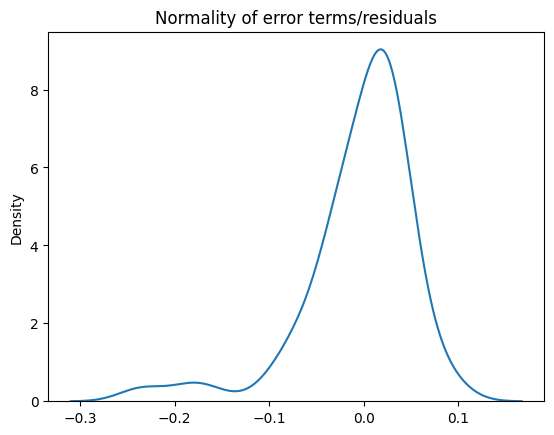

In [373]:



residuals = y_test.values-y_pred_sm
mean_residuals = np.mean(residuals)
print("Mean of Residuals:", mean_residuals)

p = sns.kdeplot(residuals)
p = plt.title('Normality of error terms/residuals')


**Homoscedasticity**

Text(0.5, 1.0, 'Residuals vs fitted values plot for homoscedasticity check')

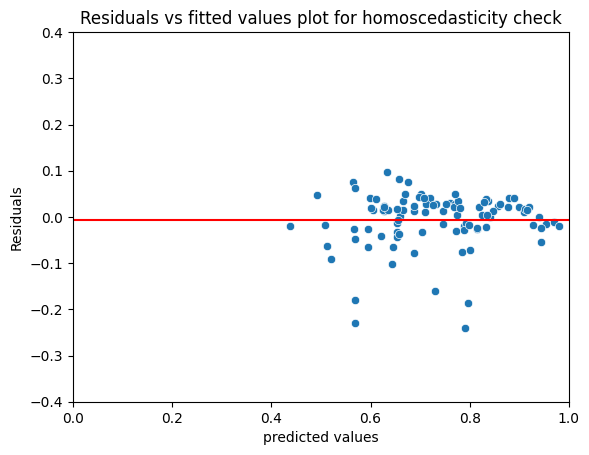

In [374]:
p = sns.scatterplot(x=y_pred_sm,y=residuals)
plt.xlabel('predicted values')
plt.ylabel('Residuals')
plt.ylim(-0.4,0.4)
plt.xlim(0,1)
plt.axhline(y=mean_residuals, color='r', linestyle='-')
plt.title("Residuals vs fitted values plot for homoscedasticity check")

#there is no clear pattern of residuals, so we can say that homoscedasticity exists.

In [375]:
import statsmodels.stats.api as sms
from statsmodels.compat import lzip
name = ['F statistic', 'p-value']
test = sms.het_goldfeldquandt(residuals, X_test_new)
lzip(name, test)

#Here null hypothesis is - residuals are homoscedastic and we can see p-value is >0.05, so we fail to reject the null hypothesis

[('F statistic', 0.4767202881961982), ('p-value', 0.9915354935613059)]

Text(0, 0.5, 'y_pred')

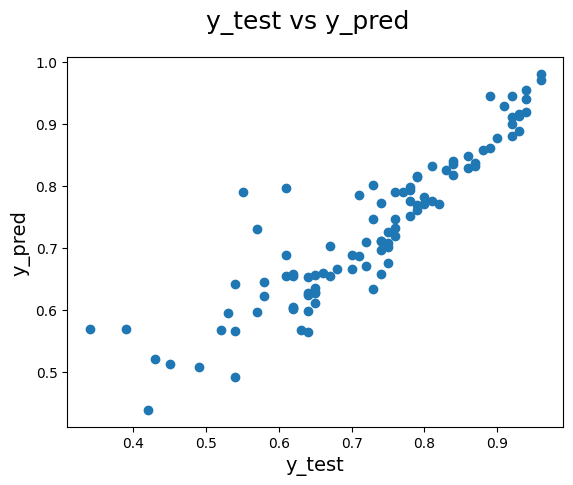

In [376]:
# Plotting y_test and y_pred to understand the spread.
fig = plt.figure()
plt.scatter(y_test.values, y_pred_sm)
fig.suptitle('y_test vs y_pred', fontsize=18) # Plot heading
plt.xlabel('y_test', fontsize=14) # X-label
plt.ylabel('y_pred', fontsize=14)